<a href="https://colab.research.google.com/github/CAVASOL/aiffel_node/blob/master/dl_project/dl_master_project_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Master node 10. Boston Housing

**학습 목표**

* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.

**데이터 로드 및 전처리**

In [ ]:
# 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

from tensorflow.keras import models
import matplotlib.pyplot as plt

In [ ]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))
print(len(x_val))
print(len(y_val))

print(x_train.shape)

404
102
122
122
(282, 13)


In [ ]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.

# 입력 데이터의 각 특성의 평균을 뺍니다
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝에 만들고, 표준편차가 1이 되도록 만듭니다
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다
test_data = test_data - mean
test_data = test_data / std

x_train[:5]

array([[1.68118e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.00000e-01,
        5.27700e+00, 9.81000e+01, 1.42610e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 3.08100e+01],
       [1.43200e-02, 1.00000e+02, 1.32000e+00, 0.00000e+00, 4.11000e-01,
        6.81600e+00, 4.05000e+01, 8.32480e+00, 5.00000e+00, 2.56000e+02,
        1.51000e+01, 3.92900e+02, 3.95000e+00],
       [4.83567e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01,
        5.90500e+00, 5.32000e+01, 3.15230e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.88220e+02, 1.14500e+01],
       [1.40300e-01, 2.20000e+01, 5.86000e+00, 0.00000e+00, 4.31000e-01,
        6.48700e+00, 1.30000e+01, 7.39670e+00, 7.00000e+00, 3.30000e+02,
        1.91000e+01, 3.96280e+02, 5.90000e+00],
       [2.83920e-01, 0.00000e+00, 7.38000e+00, 0.00000e+00, 4.93000e-01,
        5.70800e+00, 7.43000e+01, 4.72110e+00, 5.00000e+00, 2.87000e+02,
        1.96000e+01, 3.91130e+02, 1.17400e+01]])

**모델 구성 및 컴파일**

In [ ]:
# 문제 1-2: boston_housing 데이터셋을 활용하여 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
from tensorflow.keras import models, layers

# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(train_data.shape[1], ), activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# model.save('boston_housing_model_init')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


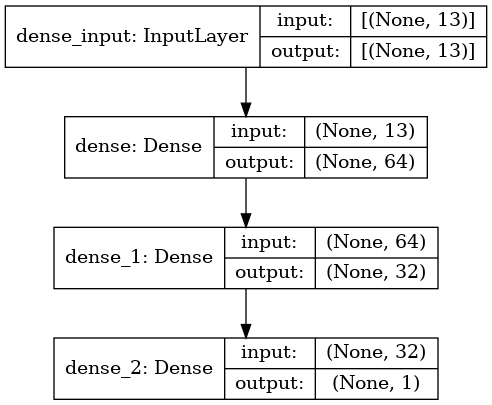

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

**모델 학습**

In [ ]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

# check_point_cb = callbacks.ModelCheckpoint('boston_housing_model_init',
#                                            save_best_only=True)

# early_stopping_cb = callbacks.EarlyStopping(patience=10,
#                                             monitor='val_loss',
#                                             restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/50
9/9 [==============================] - 1s 21ms/step - loss: 1049.8468 - mae: 26.1291 - val_loss: 630.6597 - val_mae: 21.6343
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 330.6444 - mae: 14.0686 - val_loss: 106.3575 - val_mae: 8.9487
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 164.6609 - mae: 11.6536 - val_loss: 81.9353 - val_mae: 7.2457
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 87.8761 - mae: 6.5845 - val_loss: 104.5722 - val_mae: 6.6396
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 77.5638 - mae: 6.4177 - val_loss: 77.9737 - val_mae: 7.1898
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 64.2340 - mae: 6.0522 - val_loss: 78.1878 - val_mae: 5.6848
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 64.4115 - mae: 5.4459 - val_loss: 67.3334 - val_mae: 6.1425
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 60.0146 

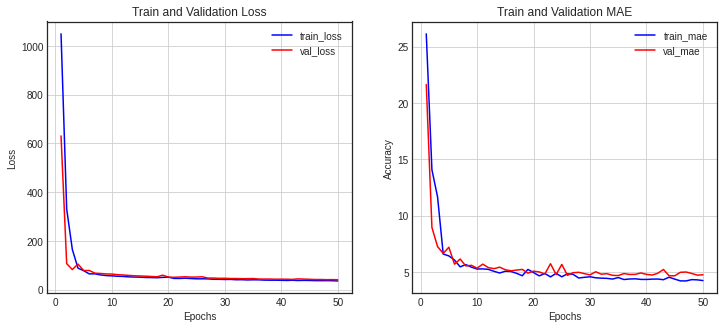

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**

In [ ]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

print(model.evaluate(test_data, test_labels))

4/4 [==============================] - 0s 2ms/step - loss: 609.8444 - mae: 23.0317
[609.8443603515625, 23.03170394897461]


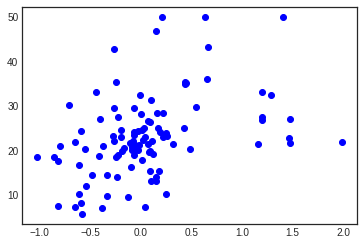

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(test_data).reshape(-1)

plt.figure()
plt.scatter(pred, test_labels, color = "blue", marker = "o", label = "label")
plt.show()